# Fourierova integralska transformacija

Fourierova transformacija je matematično orodje, s katerim preslikamo signale **iz časovne v frekvenčno domeno**.

:::{note}

Fourierova transformacija in njen inverz sta integralski preslikavi, ki ste ju definirali na predavanjih:

$$
X(f)=\int_{-\infty}^{+\infty} x(t)\,e^{-\textrm{i}\,2\pi\,f\,t}\,\textrm{d} t,
\qquad
x(t)=\int_{-\infty}^{+\infty} X(f)\,e^{\textrm{i}\,2\pi\,f\,t}\,\textrm{d} f.
$$
:::

:::{note}

Realni (pomerjeni) signali običajno niso podani v obiliki funkcijskega predpisa $x(t)$, temveč so podani v obliki časovne vrste vrdnosti signla, pomerjene pri diskretnih časovnih točkaj, $x(n\,\Delta t)$.

V praksi bomo zato pogosto raje govorii o **Diskretni Fourierovi transformaciji (DFT)**, definirani na predpostavki diskretno vzorčenega s konstantnim časovnim korakom, 
katere rezultat je *diskretna frekvenčna prdstavitev signala s konstantnim korakom v frekvenčni domeni*, $X(k\,\Delta f)$. 

Na področju procesiranja signalov je izrednega pomena tudi numerično učinkovit algoritem **Hitre Fourierove transformacije (FFT)**, ki omogoča časovno-frekvenčno preslikavo zajetih diskretnih signalov v realnem času.

O DFT in FFT boste več govorili na enem od naslednjih predavanj.

:::

## Fourierova transformacija v Pythonu

Poglejmo si uporabo algortima (diskretne) Fourierove transformacije, implementiranega v Numpy in Scipy, na primeru sinusnega signala z amplitudo $A$ ter sekundno frekvenco $p$.

Na predavanjih ste povedali, da velja:

$$
x(t) = A\,\sin(2\pi\,p\,t) = \frac{A}{2\,\textrm{i}}\,
\left(e^{\textrm{i}\,2\pi\,p\,t)}-e^{-\textrm{i}\,2\pi\,p\,t)}
\right)
$$

Fourierova transformacija $x(t)$ pa je:

$$
\mathcal{F}_{t}\left( A\,\sin(2\pi\,p\,t)\right)=
\frac{\mathrm{i} A}{2} \delta(f - p) - \frac{\mathrm{i} A}{2}\delta(f + p)
$$

Pripravimo funkcijo za vizualizacijo Fourierove transformacije sinusnega signala:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fourier_sin(A, p):
    """
    Vizualizacija fourierove transformacije sinusnega signala z amplitudo
    `A` in frekvenco `p` Hz.
    
    Vrne amplitudo spektra pri frekvenci `p`.
    """
    A_p = 1j*A/2
    
    freq = np.array([-2*p, -p, 0, p, 2*p])
    amp = np.array([0., A_p, 0, A_p, 0])
    
    plt.axhline(y=0, c='k', lw=2)
    plt.axvline(x=0, c='k', lw=1)

    for i, x in (enumerate(freq)):
        plt.plot([x, x], [0, np.abs(amp[i])], 'k', lw=2)
    plt.plot(freq, np.abs(amp), 'ro', label='analitični amplitudni spekter')
    
    plt.xlabel('$f [Hz]$')
    plt.ylabel('$|X(f)|$')


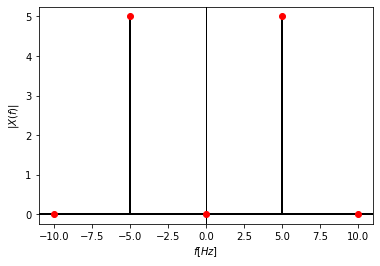

In [3]:
p = 5
A = 10
fourier_sin(A, p)

Pripravimo sinusni signal in poglejmo rezultat DFT:

In [4]:
dt = 1/(p*50)
t = np.arange(0, 1, dt)
x = A*np.sin(2*np.pi*t*p)

Izračun FFT poljubnega signala:

In [5]:
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(t), dt)

Izračun FFT realnega signala:

In [6]:
X_r = np.fft.rfft(x)
freq_r = np.fft.rfftfreq(len(t), dt)

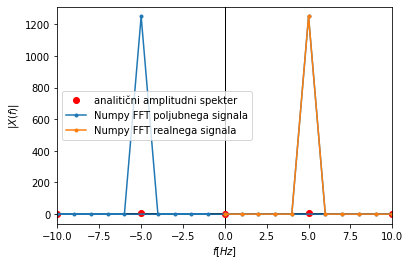

In [7]:
fourier_sin(A, p)
plt.plot(freq, np.abs(X), '.-', label='Numpy FFT poljubnega signala')
plt.plot(freq_r, np.abs(X_r), '.-', label='Numpy FFT realnega signala')
plt.xlim(-2*p, 2*p)
plt.legend();

Opzimo, da se teoretične in dobljene amplitude ne ujemajo.

:::{admonition} Naloga 1 (10 minut)
:class: important

Raziščite implementacijo skaliranja (normalizacije) [diskretne Fourierove transformacije v Numpy](https://numpy.org/doc/stable/reference/routines.fft.html) in zgornjo kodo nadgradite tako, da se bodo dobljene amplitude ujemale s teoretičnimi.

*Dodatek*: Raziščite možnosti povečanja frekvenčne ločljivosti ($\downarrow \Delta f$) pri uporabi diskretne fourierove transformacije. S katerim parametrom zajema signala je ta poezana? (Namig: argmument `n` funkcije `np.fft.rfft`.)

:::

In [8]:
ločljivost = 10
X_1 = np.fft.rfft(ločljivost*x, norm='forward', n=len(t)*ločljivost)
freq_ = np.fft.rfftfreq(n=len(t)*ločljivost, d=dt)

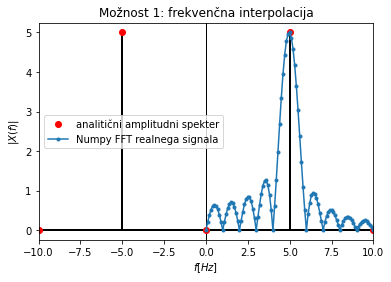

In [9]:
fourier_sin(A, p)
plt.plot(freq_, np.abs(X_1), '.-', label='Numpy FFT realnega signala')
plt.xlim(-2*p, 2*p)
plt.legend()
plt.title('Možnost 1: frekvenčna interpolacija');

In [10]:
t_2 = np.arange(0, ločljivost, dt)
x_2 = A*np.sin(2*np.pi*t_2*p)
X_2 = np.fft.rfft(x_2, norm='forward', n=len(t_2))

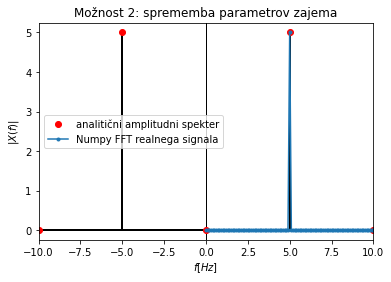

In [11]:
fourier_sin(A, p)
plt.plot(freq_, np.abs(X_2), '.-', label='Numpy FFT realnega signala')
plt.xlim(-2*p, 2*p)
plt.legend()
plt.title('Možnost 2: sprememba parametrov zajema');

## DFT realnega signala

(03-naloga-2)=
:::{admonition} Naloga 2 (30 min)
:class: important

Z uporabo generatorja signalov in Arduino zajemnega sistema pripravite ter zajamite dva signala različnih oblik s parametri iz podatkov domače naloge 3, ki jih najdete v [e-učilnici](https://e-ucilnica.fs.uni-lj.si/course/view.php?id=328).

Pri zajemu podatkov lahko uporabite LabView program, ki ste ga pripravili na prejšnji vaji, ali pa program, ki ga najdete spodaj.

Ne pozabite programa pred zajemom prirediti tako, da bo:
* deloval z vašim zajemnim sitemom (nastavitev COM vrat, mesto shranjevanja .lvm datoteke),
* če program omogoča nastavitev občutljivosti, te nastavite na vrednost 1,
* omogočal nastavitev časa trajana segmenta (namesto števila vzorcev v segmentu),
* zajel signal glede na parametre naloge (pozor, tokrat shranjujemo le en segment meritve).

Nalogo lahko rešujete v parih, tako, da si ustrezno razdelite delo (nastavitev generatorja signala, zajem signalov).

Osnovna navodila za uporabo generatorja signalov RIGOL DG 1022 najdete v [predlogi prejšnje laboratorijske vaje](02-uporaba-rigol).

:::

![labview-png](./images/03/zajem_N_channels_closed_loop.png)

Za delovanje potrebujete tudi naslednji podprogram:

![labview-podprogram](./images/03/podprogram_clip_fs.png)

Oboje lahko prenesete lahko tudi v obliki {download}`zip arhiva<./data/03/labview_zajem.zip>`.

### Obdelava zajetega signala

:::{admonition} Naloga 3 (15 min)
:class: seealso

* Sinusni signal, zajet pri prejšnji nalogi, naložimo v Python program.
* Določimo parametre (amplitudo $A$, frekvenco $p$, fazni zamik $\varphi$) zajetega signala (`scipy.optimize.curve_fit`).
* Amplitudni spekter zajetega sinusnega signala primerjajmo s teoretičnim amplitudnim spektrom funkcije $A \, \sin(2\, \pi \, p \, t)$.

:::

Pri branju podatkov, shranjnih v `.lvm` datoteke, si lahko pomagate s paketom [`lvm_read`](https://pypi.org/project/lvm-read/).

Primer uporabe si poglejmo spodaj.

In [12]:
import lvm_read
file = 'data/03/sinus.lvm'
data = lvm_read.read(file)
data['Segments']

1

Segment podatkov je v slovarju shranjen s ključem zaporednega indeksa. Vsak posameni segment je prav tako slovar, v katerem do surovih shranjenih podatkov dostopamo s ključem `'data'`:

In [13]:
kanali = data[0]['data']
kanali.shape

(500, 1)

Posamezni stolpci podatkov predstavljajo po en shranjen kanal:

In [14]:
signal = kanali[:, 0]
signal.shape

(500,)

Časovni vektor lahko pripravimo na podlagi znane frekvence vzorčenja:

In [15]:
fs = 100 # vzorcev / s
t = np.arange(len(signal)) / fs

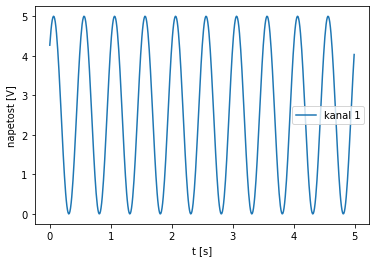

In [16]:
plt.figure()
plt.plot(t, signal, label='kanal 1')
plt.xlabel('t [s]')
plt.ylabel('napetost [V]')
plt.legend()

#### Določitev parametrov zajetega signala s `scipy.optimize.curve_fit`:

In [17]:
from scipy.optimize import curve_fit

Definiramo funkcijo modela našega signala, katere prvi parameter je neodvisna spremenljivka $t$, ostali argumenti pa so iskani parametri:

In [18]:
def model(t, A, p, phi, V_0):
    """
    Model funkcije `A*sin(2*pi*p*t + phi) + V_0` za aproksimacijo.
    """
    return A*np.sin(2*np.pi*p*t + phi) + V_0

Določimo smiselne začetne približke:

In [19]:
A_0 = (np.max(signal) - np.min(signal)) / 2

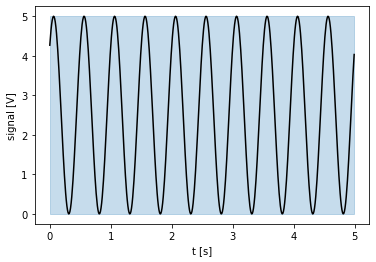

In [20]:
plt.plot(t, signal, 'k')
plt.fill_between(t, np.mean(signal) - A_0, np.mean(signal) + A_0, color='C0', alpha=0.25)
plt.xlabel('t [s]')
plt.ylabel('signal [V]');

In [21]:
from scipy.signal import find_peaks
i_vrhov = find_peaks(signal)[0]
t_vrhov = t[i_vrhov]
p_0 = 1 / (t_vrhov[1] - t_vrhov[0])

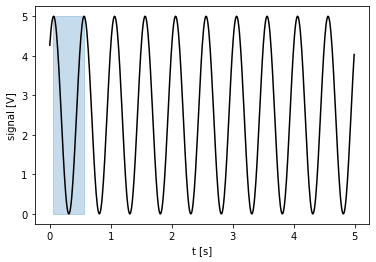

In [22]:
plt.plot(t, signal, 'k')
plt.fill_between(np.linspace(t[i_vrhov[0]], t[i_vrhov[0]] + 1/p_0), np.min(signal), np.max(signal), color='C0', alpha=0.25)
plt.xlabel('t [s]')
plt.ylabel('signal [V]');

In [23]:
V_0 = np.mean(signal)

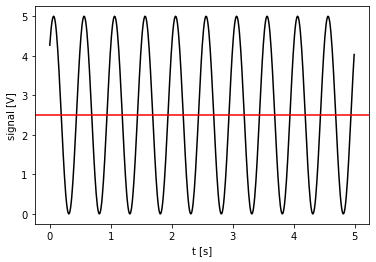

In [24]:
plt.plot(t, signal, 'k')
plt.axhline(V_0, c='r')
plt.xlabel('t [s]')
plt.ylabel('signal [V]');

In [25]:
normal_signal = (signal - V_0) / A_0
phi_0 = np.arcsin(normal_signal[0])

44.997822182694726


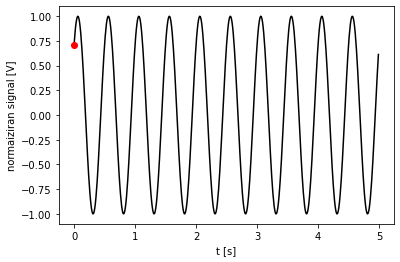

In [26]:
plt.plot(t, normal_signal, 'k')
plt.plot(t[0], normal_signal[0], 'ro')
print(np.rad2deg(phi_0))
plt.xlabel('t [s]')
plt.ylabel('normaiziran signal [V]');

In [27]:
popt, pcov = curve_fit(model, t, signal, p0=[A_0, p_0, phi_0, V_0])
A, p, phi, V_0 = popt

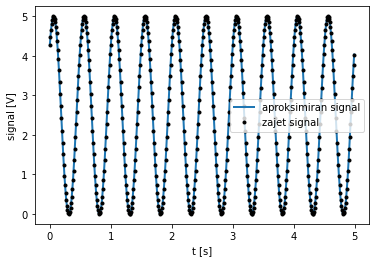

In [28]:
plt.plot(t, model(t, A, p, phi, V_0), lw=2, label='aproksimiran signal')
plt.plot(t, signal, 'k.', label='zajet signal')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('signal [V]');

### (Diskretna) Fourierova transformacija zajetega signala

In [29]:
S = np.fft.fft(signal) / len(t)
freq = np.fft.fftfreq(len(t), 1/fs)

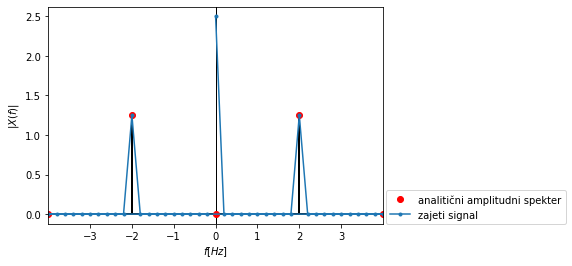

In [30]:
fourier_sin(A, p)
plt.plot(freq, np.abs(S), '.-', label='zajeti signal')
plt.xlim(-2*p, 2*p);
plt.legend(loc=(1.01, 0));

Odprava statične (DC) komponte:

In [31]:
S_1 = np.fft.fft(signal - V_0) / len(t)
freq = np.fft.fftfreq(len(t), 1/fs)

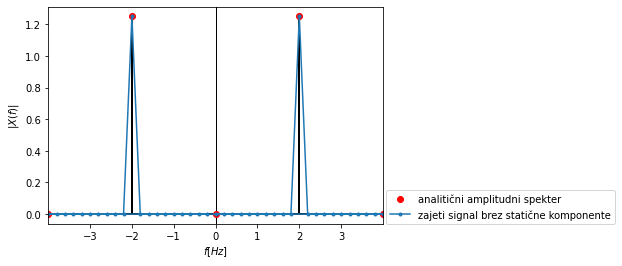

In [32]:
fourier_sin(A, p)
plt.plot(freq, np.abs(S_1), '.-', label='zajeti signal brez statične komponente')
plt.xlim(-2*p, 2*p);
plt.legend(loc=(1.01, 0));

Pogosto pri realnih signalih izračunamo amplitudni spekter le pri pozitivnih frekvencah.

Da se energija signala ohrani, dobljen enostranski spekter ustrezno skaliramo:

In [33]:
S_r = np.fft.rfft(signal - V_0) / len(t)
S_r[1:] *= 2
freq = np.fft.rfftfreq(len(t), 1/fs)

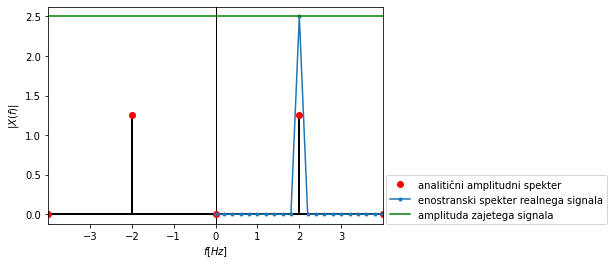

In [34]:
fourier_sin(A, p)
plt.plot(freq, np.abs(S_r), '.-', label='enostranski spekter realnega signala')
plt.axhline(A, c='g', label='amplituda zajetega signala')
plt.xlim(-2*p, 2*p)
plt.legend(loc=(1.01, 0));

In [35]:
np.isclose(np.sum(np.abs(S_1)),  np.sum(np.abs(S_r)), rtol=1e-4)

True

## Domača naloga

:::{admonition} Domača naloga
:class: warning

* Oba signala, zajeta pri [Nalogi 2](03-naloga-2), odprite v programu Python. 
* Prikažite in primerjajte njuna amplitudna ter fazna spektra.
* Enaka signala generirajte tudi numerično (na primer z uporabo `scipy.signal`). Primerjajte amplitudna in fazna spektra zajetih ter numeirčno pripravljenih signalov.

Pripravite kratko poročilo v okolju Jupyter Notebook *(od 3 do 10 celic s kodo)*, iz katerega naj bodo razvidni podatki naloge (iz tabele), ter da ste vse parametre pri izvedbi naloge tudi upoštevali (ustrezno izpišite obliko signala...). 
Poročilo oddajte tudi v `.pdf` obliki (glejte [navodila za oddajo domačih nalog](intro-domace-naloge)).

**Dodatek**: Raziščite lastnost časovnega premika Fourierove transformacije, in:
* ocenite časovni zamik med zajetima in generiranima signaloma. 
* Zajeta signala v frekvenčni domeni z uporabo lastnosti časovnega zamika poravnajte z generiranima.
* Poravnana signala preslikajte nazaj v časovno domeno ([`np.fft.irfft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html#numpy.fft.irfft)) in rezultat poravnave prikažite.

:::

:::{note}

Lastnost časovnega premika je opisana v [predlogi predavanja 3](https://jankoslavic.github.io/procesiranje_signalov/notebooks/03%20-%20Fourierova%20integralska%20transformacija.html#casovni-premik-ang-time-shifting). Časovni premik signala za vrednost $t_0$ je v frekvenčni domeni opisan z:

$$
\mathcal{F}\{x(t-t_0)\} = e^{-\textrm{i}\,2\pi\,f\,t_0}\,X(f).
$$
:::